https://www.youtube.com/watch?v=EaGbS7eWSs0&t=492s

In [9]:
import pandas as pd

In [10]:
url = 'C:/Users/deepusuresh/Documents/Data Science/10. Data types and Missing Values/1. Handling_missing_data_fillna_dropna_interpolate'

data = pd.read_csv("weather_data.csv")
data

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [11]:
df = pd.read_csv("weather_data.csv", parse_dates=["day"])
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [12]:
df.shape

(9, 4)

In [13]:
df.set_index('day',inplace=True)

In [14]:
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


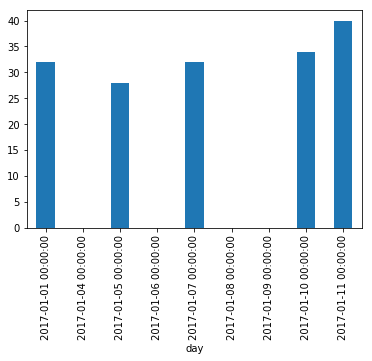

In [15]:
%matplotlib inline
df.temperature.plot.bar()

### 1. Replace NaN's with 'fill'

#### Fill all NaN with one specific value

In [16]:
new_df = df.fillna(0)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,0
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,0
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### 2. Replace NaN's by Column wise

#### Fill NaN using column names and dict

In [35]:
new_df = df.fillna({
        'temperature': 0,
        'windspeed': 0,
        'event': 'no event'
    })
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,no event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,no event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### 3. ffill ---> Forward fill method

![1_Handling_missing_data_fillna_dropna_interpolate](image/ffill.JPG)

In [36]:
new_df = df.fillna(method="ffill")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### a. limit = 1

![1_Handling_missing_data_fillna_dropna_interpolate](image/limit_1.JPG)

In [19]:
new_df = df.fillna(method="ffill", limit=1)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,NaN,Sunny
2017-01-09,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### b. limit = 2

<img src="limit_2.JPG" height="300" width="300" align="left" />

In [20]:
new_df = df.fillna(method="ffill", limit=2)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### 4. bfill ---> Backward fill method

![1_Handling_missing_data_fillna_dropna_interpolate](image/bfill.JPG)

In [17]:
new_df = df.fillna(method="bfill")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,8.0,Rain
2017-01-08,34.0,8.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### 5. axis = "columns"

![1_Handling_missing_data_fillna_dropna_interpolate](image/axis_Columns.JPG)

In [18]:
new_df = df.fillna(method="bfill", axis='columns')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-04,9,9,Sunny
2017-01-05,28,Snow,Snow
2017-01-06,7,7,NaN
2017-01-07,32,Rain,Rain
2017-01-08,Sunny,Sunny,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34,8,Cloudy
2017-01-11,40,12,Sunny


### 6. Interpolate

### a. Interpolate

![1_Handling_missing_data_fillna_dropna_interpolate](image/Interpolate.JPG)
![1_Handling_missing_data_fillna_dropna_interpolate](image/Interpolate_1.JPG)

In [23]:
new_df = df.interpolate()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,30.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


![1_Handling_missing_data_fillna_dropna_interpolate](image/Interpolate_2.JPG)
![1_Handling_missing_data_fillna_dropna_interpolate](image/Interpolate_3.JPG)

### b. Method = "time"

In [24]:
new_df = df.interpolate(method="time")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


![1_Handling_missing_data_fillna_dropna_interpolate](image/Interpolate_5.JPG)
![1_Handling_missing_data_fillna_dropna_interpolate](image/Interpolate_4.JPG)

**Notice that in above temperature on 2017-01-04 is 29 instead of 30 (in plain linear interpolate)**

**There are many other methods for interpolation such as quadratic, piecewise_polynomial, cubic etc. 
Just google "dataframe interpolate" to see complete documentation**

-------------------------------------------------------------------------------------------------------------------------------

## Drop Rows (NaN)

### 1. Dropna

In [26]:
# Deletes all rows having NaN

new_df = df.dropna()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


![1_Handling_missing_data_fillna_dropna_interpolate](image/Interpolate_6.JPG)

### 2. dropna(how='all')

In [27]:
new_df = df.dropna(how='all')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


![1_Handling_missing_data_fillna_dropna_interpolate](image/Interpolate_7.JPG)

### 3. threshold

####  thresh=1

       - To retain row  --->  atleast one valid value required

                              Inorder to keep row atleast one valid value required
                              
                              
####  thresh=2


       - Inorder to keep row atleast two valid values required

In [28]:
new_df = df.dropna(thresh=1)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


![1_Handling_missing_data_fillna_dropna_interpolate](image/Interpolate_7.JPG)

In [29]:
new_df = df.dropna(thresh=2)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-07,32.0,NaN,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


![1_Handling_missing_data_fillna_dropna_interpolate](image/Interpolate_8.JPG)

### Inserting Missing Dates

In [30]:
dt = pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
df = df.reindex(idx)
df

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


![1_Handling_missing_data_fillna_dropna_interpolate](image/Interpolate_9.JPG)